In [1]:
import pandas as pd
import numpy as np
df = pd.read_pickle('tv_data_cleansing.pkl') 

In [2]:
!conda install -y -c anaconda nltk

Solving environment: | 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - conda-forge/linux-64::mamba==1.4.2=py310h51d5547_0
  - conda-forge/linux-64::libmamba==1.4.2=hcea66bb_0
  - conda-forge/linux-64::libmambapy==1.4.2=py310h1428755_0
failed with initial frozen solve. Retrying with flexible solve.
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 23.3.1
  latest version: 24.7.1

Please update conda by running

    $ conda update -n base -c conda-forge conda

Or to minimize the number of packages updated during conda update use

     conda install conda=24.7.1


Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 23.3.1
  latest version: 24.7.1

Please update conda by running

    $ conda update -n base -c conda-forge conda

Or to minimize the number of packages updated during conda update use

     conda install

In [2]:
df.drop(['original_name'], axis=1, inplace=True)
#convert overview to string
df['overview'] = df['overview'].astype('string')
#fill NaN of overview with 'UnKnown'
df['overview'].fillna('UnKnown', inplace=True)

/tmp/ipykernel_16242/3015107302.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['overview'].fillna('UnKnown', inplace=True)


In [3]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [4]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.auto import tqdm
tqdm.pandas()
analyzer = SentimentIntensityAnalyzer()
df['overview_polarity'] = df['overview'].progress_apply(lambda x: analyzer.polarity_scores(x))

/opt/conda/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
100%|██████████| 71403/71403 [00:27<00:00, 2573.75it/s]


In [5]:
# Change data structure
df = pd.concat(
    [df.drop(['overview_polarity'], axis=1), 
     df['overview_polarity'].apply(pd.Series)], axis=1)

# Create new variable with sentiment "neutral," "positive" and "negative"
df['overview_polarity'] = df['compound'].apply(lambda x: 'positive' if x >0 else 'neutral' if x==0 else 'negative')

In [6]:
#drop overview and rename overview_polarity to overview , then convert overview to category
df.drop('overview', axis=1, inplace=True)
df.rename(columns={'overview_polarity': 'overview'}, inplace=True)
df['overview'] = df['overview'].astype('category')

In [7]:
df

,id,number_of_episodes,original_language,vote_count,vote_average,adult,first_air_date,last_air_date,homepage,popularity,...,genres_Talk,genres_News,genres_Musical,origin_continent,number_of_seasons,neg,neu,pos,compound,overview
0,71446.0,41.0,es,17836.0,8.257,False,2017-05-02,2021-12-03,www.netflix.com,96.354,...,False,False,False,Europe,10.0,0.085,0.915,0.000,-0.8020,negative
1,66732.0,34.0,en,16161.0,8.624,False,2016-07-15,2022-07-01,www.netflix.com,185.711,...,False,False,False,North America,10.0,0.244,0.756,0.000,-0.6705,negative
2,63174.0,93.0,en,13870.0,8.486,False,2016-01-25,2021-09-10,www.netflix.com,416.668,...,False,False,False,North America,10.0,0.306,0.616,0.078,-0.9387,negative
3,69050.0,137.0,en,13180.0,8.479,False,2017-01-26,2023-08-23,Other,143.750,...,False,False,False,North America,10.0,0.151,0.701,0.148,0.2263,positive
4,93405.0,9.0,ko,13053.0,7.831,False,2021-09-17,2021-09-17,www.netflix.com,115.587,...,False,False,False,Asia,10.0,0.056,0.637,0.307,0.7430,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71398,240293.0,32.0,Other,0.0,0.000,False,2023-11-20,2023-12-21,Other,3.710,...,False,False,False,Asia,10.0,0.000,1.000,0.000,0.0000,neutral
71399,240693.0,8.0,de,0.0,0.000,False,2023-11-30,2023-11-30,Other,3.028,...,False,False,False,Europe,10.0,0.000,1.000,0.000,0.0000,neutral
71400,239099.0,1.0,zh,0.0,0.000,False,2023-03-03,2023-03-03,Other,1.400,...,False,False,False,Asia,10.0,0.000,1.000,0.000,0.0000,neutral
71401,240696.0,1.0,Other,0.0,0.000,False,2023-11-30,2023-11-30,Other,1.895,...,False,False,False,Asia,10.0,0.249,0.688,0.063,-0.6705,negative


In [8]:
#convert all category type columns to numbers using LableEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'category':
        df[column] = le.fit_transform(df[column])

In [9]:
#drop neg neu pos compound
df.drop(['neg', 'neu', 'pos', 'compound'], axis=1, inplace=True)

In [10]:
df.columns = df.columns.str.replace(' ', '_')
df.columns = df.columns.str.replace('&', 'and')

In [12]:
!pip install matplotlib

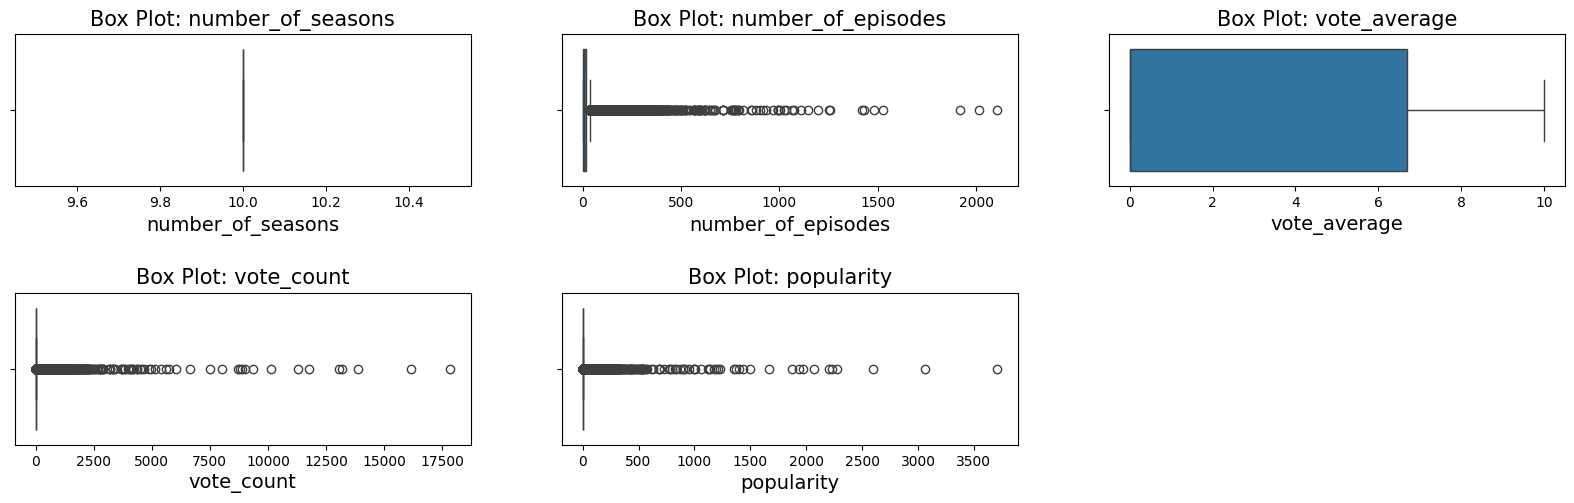

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
## Using box (Wiskers) plot 
plt.figure(figsize=(20,200))

def outliers_boxplot(df):
    for i, col in enumerate(df.columns):
        
            ax = plt.subplot(60, 3, i+1)
            sns.boxplot(data=df, x=col, ax=ax)
            plt.subplots_adjust(hspace = 0.7)
            plt.title('Box Plot: {}'.format(col), fontsize=15)
            plt.xlabel('{}'.format(col), fontsize=14)

#create new Dataframe from the columns       number_of_seasons, number_of_episodes   ,vote_average
df_plot = df[['number_of_seasons', 'number_of_episodes', 'vote_average','vote_count','popularity']]

outliers_boxplot(df_plot)

In [12]:
df['first_air_month'] = pd.DatetimeIndex(df['first_air_date']).month
df = df.drop(['first_air_date'], axis=1)
df = df.drop(['last_air_date'], axis=1)

In [13]:
df.number_of_seasons = df.number_of_seasons.astype(int)

In [15]:
#fill NaN languages with Other
df['languages'].fillna('Other', inplace=True)
#split languages column , count the uniqe values and put in new column
df['languages_count'] = df['languages'].str.split(',').apply(len)
#drop languages and rename languages_count to languages
df.drop(['languages'], axis=1, inplace=True)
df.rename(columns={'languages_count': 'languages'}, inplace=True)

/tmp/ipykernel_16242/2647510751.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['languages'].fillna('Other', inplace=True)


In [18]:
df['languages'].value_counts()

languages
1     68576
2      2254
3       409
4        96
5        36
6        18
7         6
8         6
10        1
12        1
Name: count, dtype: int64

In [21]:
#fill NaN spoken_languages with Other
df['spoken_languages'].fillna('Other', inplace=True)
#split spoken_languages column , count the uniqe values and put in new column
df['spoken_languages_count'] = df['spoken_languages'].str.split(',').apply(len)
#drop spoken_languages and rename spoken_languages_count to spoken_languages
df.drop(['spoken_languages'], axis=1, inplace=True)
df.rename(columns={'spoken_languages_count': 'spoken_languages'}, inplace=True)

/tmp/ipykernel_16242/520763124.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['spoken_languages'].fillna('Other', inplace=True)


In [22]:
df['spoken_languages'].value_counts()

spoken_languages
1     68878
2      2025
3       350
4        88
5        35
6        17
7         4
8         4
10        1
12        1
Name: count, dtype: int64

In [25]:
#fill NaN production_countries with Other
df['production_countries'].fillna('Other', inplace=True)
#split production_countries column , count the uniqe values and put in new column
df['production_countries_count'] = df['production_countries'].str.split(',').apply(len)
#drop production_countries and rename production_countries_count to production_countries
df.drop(['production_countries'], axis=1, inplace=True)
df.rename(columns={'production_countries_count': 'production_countries'}, inplace=True)

/tmp/ipykernel_16242/2591051910.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['production_countries'].fillna('Other', inplace=True)


In [26]:
df['production_countries'].value_counts()

production_countries
1     69752
2      1306
3       220
4        71
5        21
6         8
7         6
10        4
9         4
8         3
12        3
22        1
18        1
16        1
13        1
17        1
Name: count, dtype: int64

In [35]:
df.drop(['id'], axis=1, inplace=True)

In [36]:
df.to_csv('tv_feature_selection.csv')
df.to_pickle('tv_feature_selection.pkl')

In [37]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SelectKBest, f_regression
from tqdm import tqdm

In [38]:
target = 'popularity'
features = df.columns.drop([target])

X = df[features]
y = df[target]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create preprocessing steps
preprocessor = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Define the models to compare
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'SVR': SVR()
}

In [39]:
def evaluate_model(model, X, y):
    scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-scores)
    return rmse_scores.mean()

In [40]:
results = {}

for name, model in tqdm(models.items()):
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('feature_selection', SelectKBest(f_regression, k=20)),
                               ('model', model)])
    rmse = evaluate_model(pipeline, X_train, y_train)
    results[name] = rmse


100%|██████████| 7/7 [13:29<00:00, 115.64s/it]


In [41]:
# Print results
print("\
Model Comparison Results (RMSE):")
for name, rmse in results.items():
    print(f"{name}: {rmse:.4f}")

# Train the best model
best_model_name = min(results, key=results.get)
best_model = models[best_model_name]

best_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                ('feature_selection', SelectKBest(f_regression, k=20)),
                                ('model', best_model)])

best_pipeline.fit(X_train, y_train)

# Make predictions on test set
y_pred = best_pipeline.predict(X_test)

# Calculate final RMSE and R2 score
final_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
final_r2 = r2_score(y_test, y_pred)

print(f"\
Best Model: {best_model_name}")
print(f"Final Test RMSE: {final_rmse:.4f}")
print(f"Final Test R2 Score: {final_r2:.4f}")

# Feature importance (if applicable)
if hasattr(best_pipeline.named_steps['model'], 'feature_importances_'):
    feature_importance = best_pipeline.named_steps['model'].feature_importances_
    feature_names = best_pipeline.named_steps['feature_selection'].get_feature_names_out(features)
    importance_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importance})
    importance_df = importance_df.sort_values('importance', ascending=False).head(10)
    print("\
Top 10 Important Features:")
    print(importance_df)
elif best_model_name in ['Linear Regression', 'Ridge Regression', 'Lasso Regression']:
    coefficients = best_pipeline.named_steps['model'].coef_
    feature_names = best_pipeline.named_steps['feature_selection'].get_feature_names_out(features)
    coef_df = pd.DataFrame({'feature': feature_names, 'coefficient': coefficients})
    coef_df = coef_df.reindex(coef_df.coefficient.abs().sort_values(ascending=False).index).head(10)
    print("\
Top 10 Features by Coefficient Magnitude:")
    print(coef_df)

Model Comparison Results (RMSE):
Linear Regression: 37.9338
Ridge Regression: 37.9338
Lasso Regression: 37.9909
Decision Tree: 47.5862
Random Forest: 37.4651
Gradient Boosting: 37.3222
SVR: 40.3310
Best Model: Gradient Boosting
Final Test RMSE: 36.2286
Final Test R2 Score: 0.0791
Top 10 Important Features:
                        feature  importance
0            number_of_episodes    0.405279
1                    vote_count    0.388516
9   genres_Action_and_Adventure    0.085686
2                  vote_average    0.038884
6                  genres_Crime    0.015643
5              episode_run_time    0.014873
7                  genres_Drama    0.014697
10                genres_Comedy    0.011030
4                          type    0.008913
12                genres_Family    0.005398


Model Comparison Results (Mean Squared Error):
Linear Regression: 37.9338
Ridge Regression: 37.9338
Lasso Regression: 37.9909
Decision Tree: 47.5862
Random Forest: 37.4651
Gradient Boosting: 37.3222
SVR: 40.3310


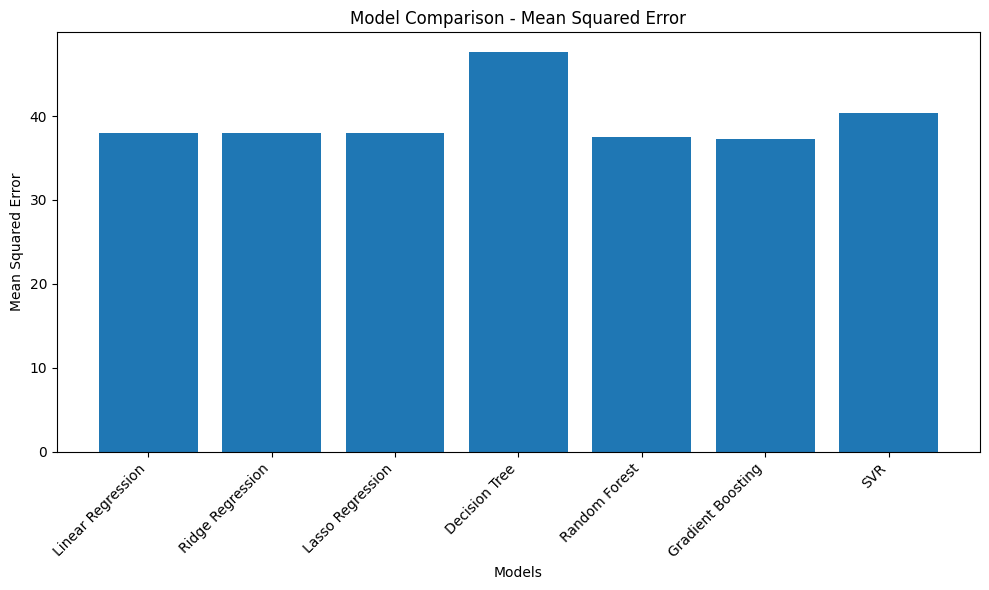

Best performing model: Gradient Boosting
Training the best model...
Making predictions...
Best Model Performance on Test Set:
Mean Squared Error: 1338.3883
R-squared Score: 0.0610


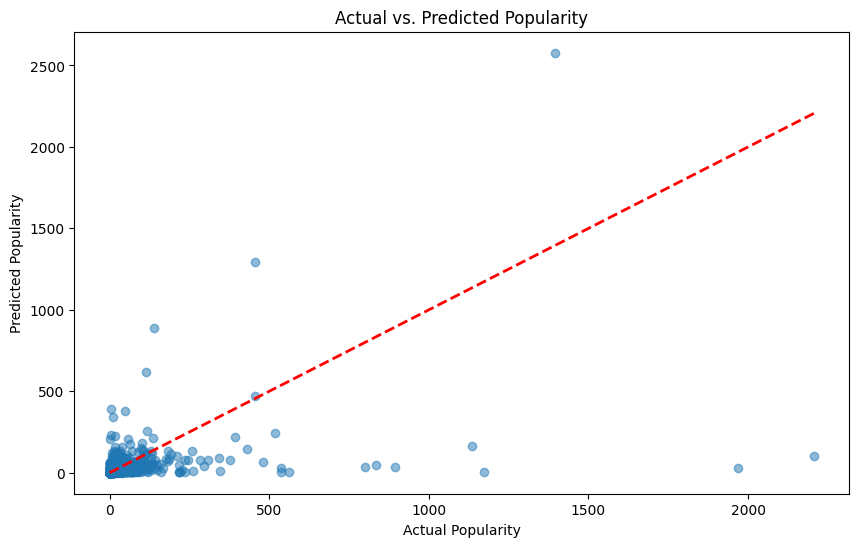

In [42]:
import matplotlib.pyplot as plt
print("\
Model Comparison Results (Mean Squared Error):")
for name, mse in results.items():
    print(f"{name}: {mse:.4f}")

# Visualize results
plt.figure(figsize=(10, 6))
plt.bar(results.keys(), results.values())
plt.title('Model Comparison - Mean Squared Error')
plt.xlabel('Models')
plt.ylabel('Mean Squared Error')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Train the best model
best_model_name = min(results, key=results.get)
print(f"\
Best performing model: {best_model_name}")

best_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                ('model', models[best_model_name])])

print("Training the best model...")
best_pipeline.fit(X_train, y_train)

# Make predictions on the test set
print("Making predictions...")
y_pred = best_pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\
Best Model Performance on Test Set:")
print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared Score: {r2:.4f}")

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Popularity')
plt.ylabel('Predicted Popularity')
plt.title('Actual vs. Predicted Popularity')
plt.show()